# Military Power Clustering Project

https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Ingest Data  

In [7]:
df = pd.read_excel("World military power.xlsx",header=[0,1])
df.head().T

0  \
2020 ranking      Military Strength                            Afghanistan   
                  Military Strength Power Index                     1.3444   
Airforce Strength Aircraft Strength                            Afghanistan   
                  Aircraft Strength value                              260   
                  Fighter/Interceptor Strength                 Afghanistan   
                  Fighter/Interceptor Strength value                     0   
                  Attack Aircraft Strength                     Afghanistan   
                  Attack Aircraft Strength value                        25   
                  Transport Aircraft Fleet Strength            Afghanistan   
                  Transport Aircraft Fleet Strength value               30   
                  Trainer Aircraft Fleet                       Afghanistan   
                  Trainer Aircraft Fleet value                           0   
                  Helicopter Fleet Strength                    Afghanistan   
                  Helicopter Fleet Strength value                      187   
                  Attack Helicopter Fleet Strength             Afghanistan   
                  Attack Helicopter Fleet Strength value                 0   
Land Strength     Tank Strength                                Afghanistan   
                  Tank Strength value                                    0   
                  AFV/APC Strength                             Afghanistan   
                  AFV/APC Strength value                              1062   
                  Self-Propelled Artillery Strength            Afghanistan   
                  Self-Propelled Artillery Strength value                0   
                  Towed Artillery Strength                     Afghanistan   
                  Towed Artillery Strength value                       176   
                  Rocket Projector Strength                    Afghanistan   
                  Rocket Projector Strength value                       50   
Navy Strength     Navy Fleet Strengths                         Afghanistan   
                  Navy Fleet Strengths value                           0.0   
                  Aircraft Carrier Fleet Strength              Afghanistan   
                  Aircraft Carrier Fleet Strength value                0.0   
                  Submarine Fleet Strength                     Afghanistan   
                  Submarine Fleet Strength value                       0.0   
                  Destroyer Fleet Strength                     Afghanistan   
                  Destroyer Fleet Strength value                       0.0   
                  Frigate Fleet Strength                       Afghanistan   
                  Frigate Fleet Strength value                         0.0   
Finances          defense spending budget                      Afghanistan   
                  defense spending budget value            12,00,00,00,000   
                  External Debt                                Afghanistan   
                  External Debt value                       2,84,00,00,000   
Logistics         Airport Totals                               Afghanistan   
                  Airport Totals value                                  43   
Natural resources Oil Production                               Afghanistan   
                  Oil Production value                                   0   
                  Oil Consumption                              Afghanistan   
                  Oil Consumption value                               5500   
                  Proven Oil Reserves                          Afghanistan   
                  Proven Oil Reserves value                              0   
Manpower          Available Manpower                           Afghanistan   
                  Available Manpower value                     1,43,25,743   
                  Total Population                             Afghanistan   
                 

# EDA

## Implement basic steps to see how is your data looks like

In [8]:
df.shape

(138, 60)

___

In [10]:
df.isna().sum().sum()

288

In [11]:
df.isnull().sum().sum()

288

In [13]:
df.isnull().any().any()

True

In [14]:
df.isna().sum().any()

True

___

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    int64  
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    int64  
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

___

In [17]:
df.duplicated().any()

False

In [18]:
df.duplicated().sum()

0

___

## Convert multi index columns to one level

In [20]:
df.columns

MultiIndex([(     '2020 ranking',                       'Military Strength'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

https://www.pauldesalvo.com/how-to-flatten-multiindex-columns-into-a-single-index-dataframe-in-pandas/
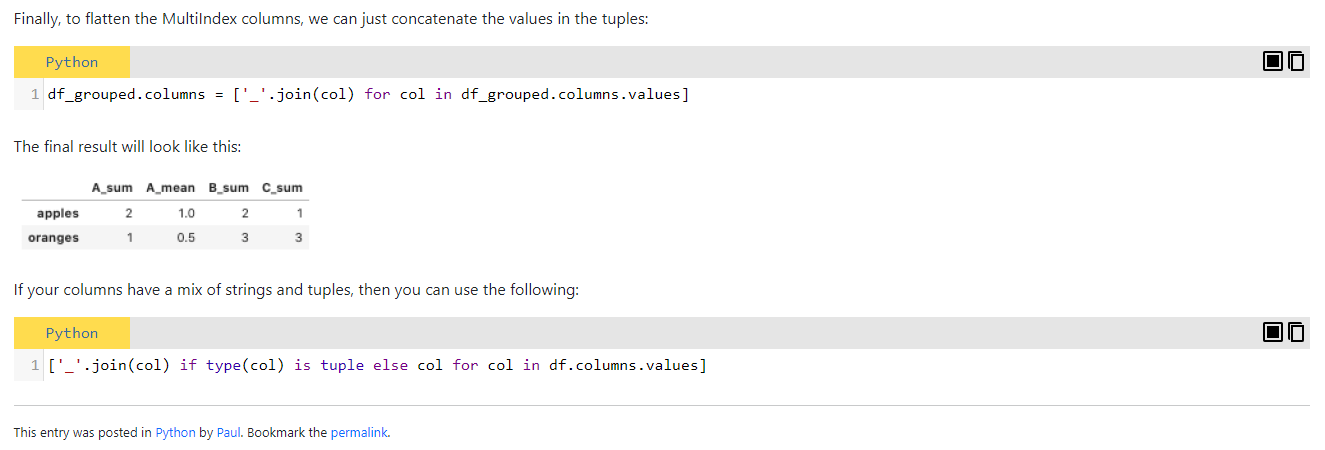

code --> df_grouped.columns = ['_'.join(col) for col in df_grouped.columns.values]

In [21]:
df.columns = ['_'.join(col) for col in df.columns.values]

In [22]:
df.columns

Index(['2020 ranking_Military Strength',
       '2020 ranking_Military Strength Power Index',
       'Airforce Strength_Aircraft Strength',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength', 'Land Strength_Tank Strength value',
       'Land Strength

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   2020 ranking_Military Strength                             138 non-null    object 
 1   2020 ranking_Military Strength Power Index                 138 non-null    float64
 2   Airforce Strength_Aircraft Strength                        138 non-null    object 
 3   Airforce Strength_Aircraft Strength value                  138 non-null    int64  
 4   Airforce Strength_Fighter/Interceptor Strength             138 non-null    object 
 5   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    int64  
 6   Airforce Strength_Attack Aircraft Strength                 138 non-null    object 
 7   Airforce Strength_Attack Aircraft Strength value           138 non-null    int64  
 8   Airforce S

In [27]:
df.head(6).T

,0,1,2,3,4,5
2020 ranking_Military Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia
2020 ranking_Military Strength Power Index,1.3444,2.3137,0.4659,0.8379,0.6521,2.1251
Airforce Strength_Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia
Airforce Strength_Aircraft Strength value,260,19,551,295,227,64
Airforce Strength_Fighter/Interceptor Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia
Airforce Strength_Fighter/Interceptor Strength value,0,0,103,72,24,0
Airforce Strength_Attack Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia
Airforce Strength_Attack Aircraft Strength value,25,0,22,18,7,9
Airforce Strength_Transport Aircraft Fleet Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia
Airforce Strength_Transport Aircraft Fleet Strength value,30,0,59,30,9,3


## Detect and drop duplicated columns

In [30]:
df.duplicated().any()

False

___

In [34]:
df.columns

Index(['2020 ranking_Military Strength',
       '2020 ranking_Military Strength Power Index',
       'Airforce Strength_Aircraft Strength',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength', 'Land Strength_Tank Strength value',
       'Land Strength

In [68]:
[i[0] for i in df.columns.str.findall(".*value") if i != []]

['Airforce Strength_Aircraft Strength value',
 'Airforce Strength_Fighter/Interceptor Strength value',
 'Airforce Strength_Attack Aircraft Strength value',
 'Airforce Strength_Transport Aircraft Fleet Strength value',
 'Airforce Strength_Trainer Aircraft Fleet value',
 'Airforce Strength_Helicopter Fleet Strength value',
 'Airforce Strength_Attack Helicopter Fleet Strength value',
 'Land Strength_Tank Strength value',
 'Land Strength_AFV/APC Strength value',
 'Land Strength_Self-Propelled Artillery Strength value',
 'Land Strength_Towed Artillery Strength value',
 'Land Strength_Rocket Projector Strength value',
 'Navy Strength_Navy Fleet Strengths value',
 'Navy Strength_Aircraft Carrier Fleet Strength value',
 'Navy Strength_Submarine Fleet Strength value',
 'Navy Strength_Destroyer Fleet Strength value',
 'Navy Strength_Frigate Fleet Strength value',
 'Finances_defense spending budget value',
 'Finances_External Debt value',
 'Logistics_Airport Totals value',
 'Natural resources_Oil